In [1]:
from __future__ import division, print_function, absolute_import

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import tflearn
from tflearn.data_utils import shuffle, to_categorical

In [2]:
from tflearn.datasets import cifar10
(X, Y), (X_test, Y_test) = cifar10.load_data()
X, Y = shuffle(X, Y)
Y = to_categorical(Y, 10)
Y_test = to_categorical(Y_test, 10)

In [3]:
# Building the encoder
srcData = tflearn.input_data(shape=[None, 32, 32, 3])

encoder = tflearn.conv_2d(srcData, 4, 3, activation='relu')
encoder = tflearn.max_pool_2d(encoder, 2)
encoder = tflearn.conv_2d(encoder, 8, 3, activation='relu')
encoder = tflearn.max_pool_2d(encoder, 2)
encoder = tflearn.conv_2d(encoder, 16, 3, activation='relu')
encoder = tflearn.max_pool_2d(encoder, 2)

encoder = tflearn.conv_2d(encoder, 32, 3, activation='relu')

# Building the decoder
decoder = tflearn.upsample_2d(encoder, 2)
decoder = tflearn.conv_2d(decoder, 16, 3, activation='relu')
decoder = tflearn.upsample_2d(decoder, 2)
decoder = tflearn.conv_2d(decoder, 8, 3, activation='relu')
decoder = tflearn.upsample_2d(decoder, 2)
decoder = tflearn.conv_2d(decoder, 4, 3, activation='relu')

decoder = tflearn.conv_2d(decoder, 3, 1, activation='sigmoid')

In [4]:
# Regression, with mean square error
net = tflearn.regression(decoder, 
                         optimizer='adam', 
                         learning_rate=0.001,
                         loss='mean_square', metric=None)

In [5]:
# Training the auto encoder
model = tflearn.DNN(net, tensorboard_verbose=0)
model.fit(X, X, 
          n_epoch=100, 
          validation_set=(X_test, X_test),
          run_id="convolutional_autoencoder", 
          batch_size=128)

Training Step: 39100  | total loss: 0.00802
| Adam | epoch: 100 | loss: 0.00802 | val_loss: 0.00805 -- iter: 50000/50000
Training Step: 39100  | total loss: 0.00802
| Adam | epoch: 100 | loss: 0.00802 | val_loss: 0.00805 -- iter: 50000/50000
--


In [6]:
# Encoding X[0] for test
print("\nTest encoding of X[0]:")
# New model, re-using the same session, for weights sharing
encoding_model = tflearn.DNN(encoder, session=model.session)
print(encoding_model.predict([X[0]]))
#plt.imshow(np.reshape(X[0], (32, 32, 3)))


Test encoding of X[0]:
[[[[1.0082802772521973, 0.4103075861930847, 0.8620036840438843, 0.6381564736366272, 0.666751503944397, 0.2307281494140625, 0.0349479615688324, 0.64007967710495, 0.8526422381401062, 0.637660026550293, 0.8841350674629211, 0.3562937080860138, 0.42705047130584717, 0.44163084030151367, 0.0, 0.6584644317626953, 0.35149574279785156, 1.0402745008468628, 0.5082732439041138, 0.5695413947105408, 0.4228397607803345, 0.651617169380188, 0.0, 0.6038001179695129, 0.9945264458656311, 0.32020965218544006, 1.1769578456878662, 0.5533252954483032, 0.4778706431388855, 0.40075570344924927, 0.7576553225517273, 0.4594843089580536], [0.5696674585342407, 0.0, 0.34642353653907776, 0.24665145576000214, 0.4791116416454315, 0.0, 0.3672596514225006, 0.3706301748752594, 0.5699260830879211, 0.4166422486305237, 0.698172390460968, 0.6869379878044128, 0.5548070669174194, 0.8996360301971436, 0.0, 0.9675772190093994, 0.4072737395763397, 0.5420331954956055, 0.5608052611351013, 0.317757248878479, 0.493


Visualizing results after being encoded and decoded:


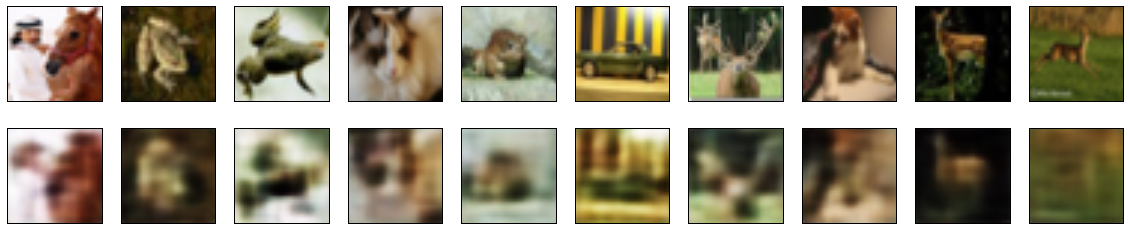

In [7]:

# Testing the image reconstruction on new data (test set)
print("\nVisualizing results after being encoded and decoded:")
X_test = tflearn.data_utils.shuffle(X_test)[0]
# Applying encode and decode over test set
encode_decode = model.predict(X_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(np.array(encode_decode[i]).reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()